## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the main data into master dataframe for analysis
bike_data = pd.read_csv("day.csv")

In [3]:
# enlist the dataframe columns to get bird's eye view and discard any column if necessary 
print(list(bike_data))
print(bike_data.shape)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
(730, 16)


In [4]:
# looking at first few rows 
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Get basic idea of data using describe()
print(bike_data.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.5448

# Data Preparation

This step comprises of taking care of issues with data like missing data, erroneous data, etc. 
If 'business knowledge' tells that certain data must be changed or removed, that is done here.

## Data Cleanup : 
Drop missing columns and duplicate rows.

In [6]:
cols_with_zerodata_inpercent = round(100*(bike_data.isnull().sum()/len(bike_data.index)), 2)

print("Columns with 100% missing data:")
colnames = bike_data.columns[cols_with_zerodata_inpercent==100].values
print("Num col:", len(colnames), colnames)

cols_with_nonuniq_values = bike_data.nunique()

colnamesnouniq = bike_data.columns[(cols_with_nonuniq_values <= 1)].values
print("Columns with just 1 unique value:", len(colnamesnouniq), colnamesnouniq)

bike_data.drop_duplicates(keep=False, inplace=True)

bike_data.shape

Columns with 100% missing data:
Num col: 0 []
Columns with just 1 unique value: 0 []


(730, 16)

In [7]:
#from the given data we can see that instant is an index column so we drop it
bike_data.drop(['instant'],axis=1,inplace=True)
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#checking for datatypes of columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [9]:
#Let us convert dteday to datetime datatype to make it represent data it holds properly
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

###### From data we can see that: 
>season, yr, mnth, holiday, weekday, workingday and weathersit are **categorical variables**

#### <font color=maroon>We can observe in the dataset that some of the variables like 'weathersit', 'season' and 'weekday' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). </font>
#### <font color=maroon>These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, let's convert such feature values into categorical string values before proceeding with model building.</font>

In [10]:
bike_data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike_data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike_data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike_data['holiday'].replace({1:"Yes",0:"No"},inplace=True)
bike_data['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec",},inplace=True)
bike_data['workingday'].replace({1:"Yes",0:"No"},inplace=True)
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,No,Monday,Yes,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,No,Tuesday,Yes,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,No,Wednesday,Yes,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,No,Thursday,Yes,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,No,Friday,Yes,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 91.2+ 

# Exploratory Data Analysis :

# Data Analysis

### Visualization of correlation values to see if any variables can be eliminated

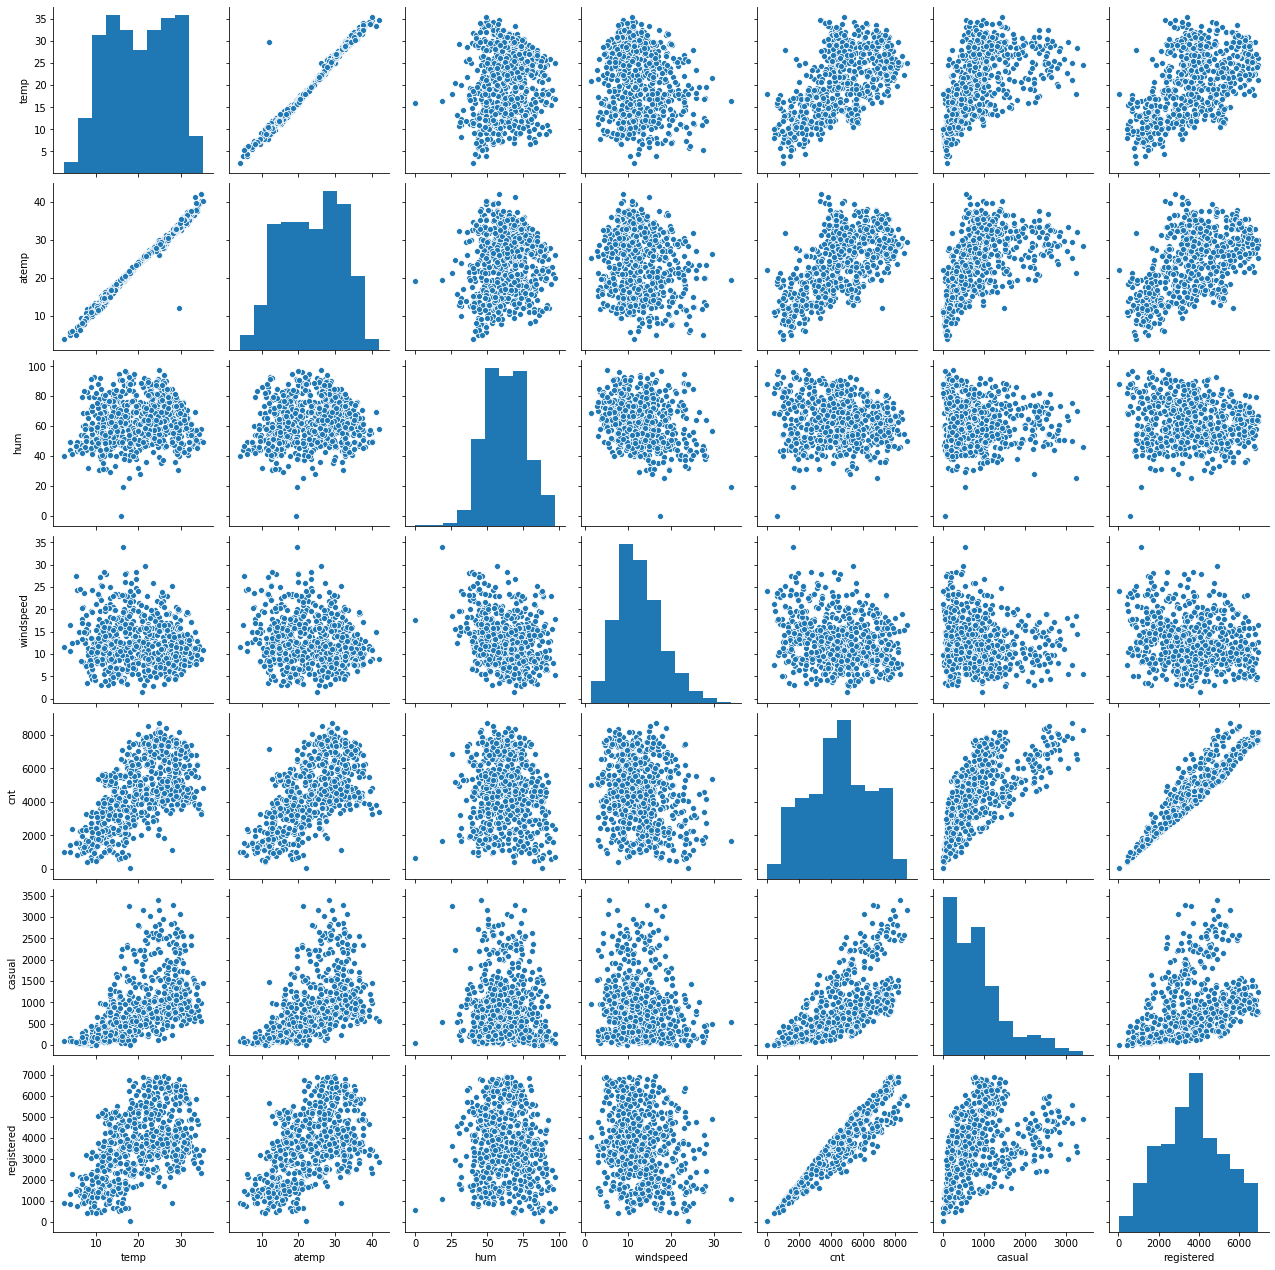

In [12]:
#PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed',"cnt","casual","registered"])
plt.show()

### Observation
Relationship between variables is observed between:
1. temp and atemp
2. registered and cnt
3. registered and casual
4. casual and cnt

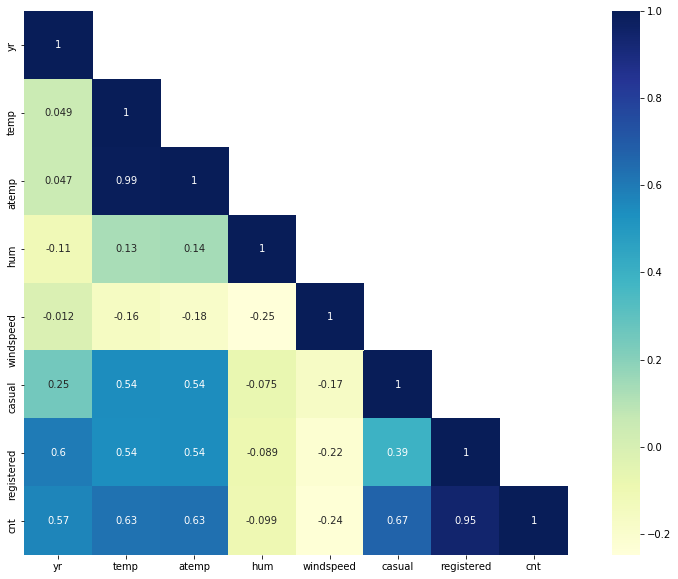

In [13]:
# Let's see the correlation matrix to see the actual correlation values
mask = np.array(bike_data.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu", mask=mask, square =True)
plt.show()

**<font color=navy>As we can see the correlation between temp and atemp is 0.99 which is almost 1. 
Let's drop temp and consider atemp(feeling temperature) as it takes air and humidity into consideration.  </font>**

In [14]:
bike_data.drop(['temp'],axis=1,inplace=True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,No,Monday,Yes,Mist_cloudy,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,No,Tuesday,Yes,Mist_cloudy,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,No,Wednesday,Yes,Clear_Few Clouds,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,No,Thursday,Yes,Clear_Few Clouds,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,No,Friday,Yes,Clear_Few Clouds,11.46350,43.6957,12.522300,82,1518,1600


**<font color=navy>The variables 'registered' and 'casual' have high correlation with 'cnt' as both of these contribute to the target variable cnt i.e, registered + casual = cnt. Let's drop it as it might override the effect of other independent variables. </font>**

In [15]:
bike_data.drop(['registered','casual'],axis=1,inplace=True)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,Jan,No,Monday,Yes,Mist_cloudy,18.18125,80.5833,10.749882,985
1,2018-02-01,spring,0,Jan,No,Tuesday,Yes,Mist_cloudy,17.68695,69.6087,16.652113,801
2,2018-03-01,spring,0,Jan,No,Wednesday,Yes,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,2018-04-01,spring,0,Jan,No,Thursday,Yes,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,2018-05-01,spring,0,Jan,No,Friday,Yes,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [16]:
#we can see column dteday and yr month are representing same data, so let's drop dteday as it doesn't add any value to our analysis

bike_data.drop(['dteday'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,No,Monday,Yes,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,No,Tuesday,Yes,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,No,Wednesday,Yes,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,No,Thursday,Yes,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,No,Friday,Yes,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [17]:
# re-usable common method to plot categorical dependent variable against cnt
def PlotCategoricalData(df, category, price) :

    # figure
    plt.figure(figsize = (20, 5))

    # bar plot to visualize categorical distribution
    plt.subplot(1, 2, 1)
    sns.barplot(x = df.iloc[:, 0], y = df.iloc[:, 1], data = df)
    plt.xlabel(df.columns[0], fontsize = 20)
    plt.ylabel(df.columns[1], fontsize = 20)
    plt.title(df.columns[0] + ' distribution', fontsize = 25)

    # plot Y axis vs X axis
    plt.subplot(1, 2, 2)
    sns.boxplot(category, price)
    plt.xlabel(df.columns[0], fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title(df.columns[0] + ' vs count of rental bikes', fontsize = 25)  

    plt.show()
    
    return

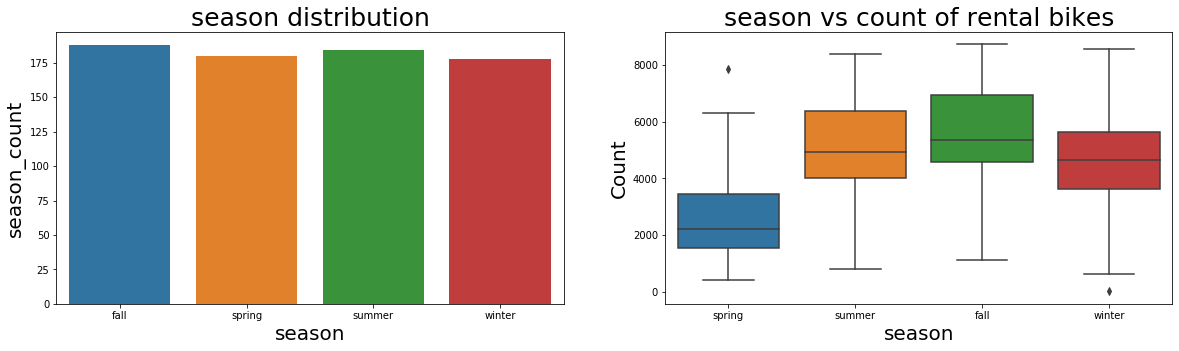

In [18]:
season_data = bike_data.loc[:, ['season', 'cnt']]

season_count = season_data.groupby('season').size().reset_index(name = 'season_count')
PlotCategoricalData(season_count, bike_data.season, bike_data.cnt)

### Observation:
The plot shows that in the **fall** season the number of bikes rented is significantly high.
**Spring** is the season with least number of bikes rented.

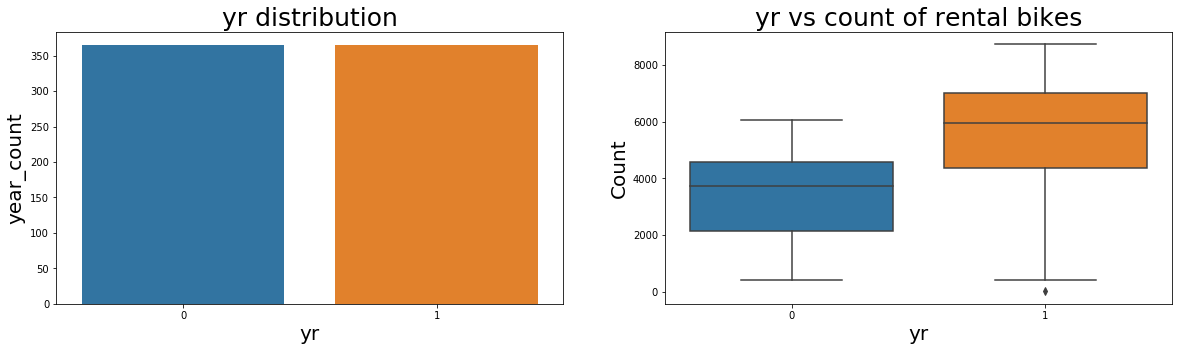

In [19]:
year_data = bike_data.loc[:, ['yr', 'cnt']]

year_count = year_data.groupby('yr').size().reset_index(name = 'year_count')
PlotCategoricalData(year_count, bike_data.yr, bike_data.cnt)

### Observation:
The plot shows that in **2019** the number of bikes rented has significantly increased compared to its previous year 2018.

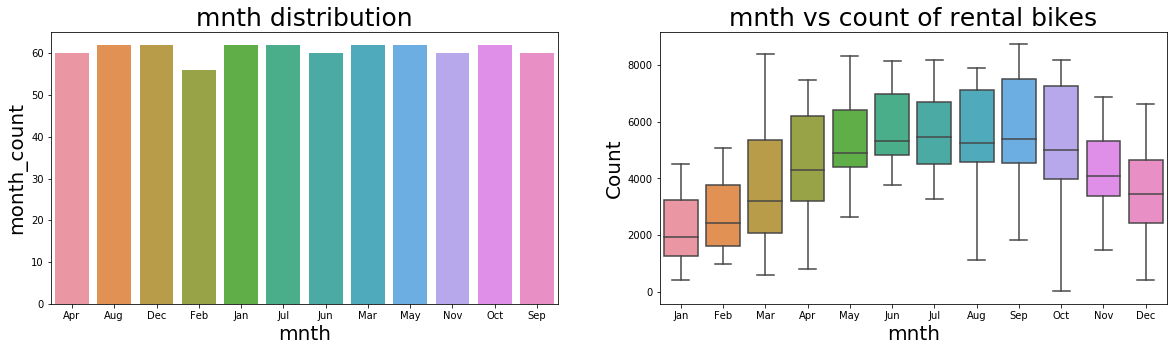

In [20]:
month_data = bike_data.loc[:, ['mnth', 'cnt']]

month_count = month_data.groupby('mnth').size().reset_index(name = 'month_count')
PlotCategoricalData(month_count, bike_data.mnth, bike_data.cnt)

### Observation:
The plot shows that in **September** the number of bikes rented is significantly high followed by **October** and **August**.
January is the month with least number of bikes rented. We can see a general pattern indicating reduction in the bike rentals in winter (November to February) since that period is not conducive for bike rides due to cold. 

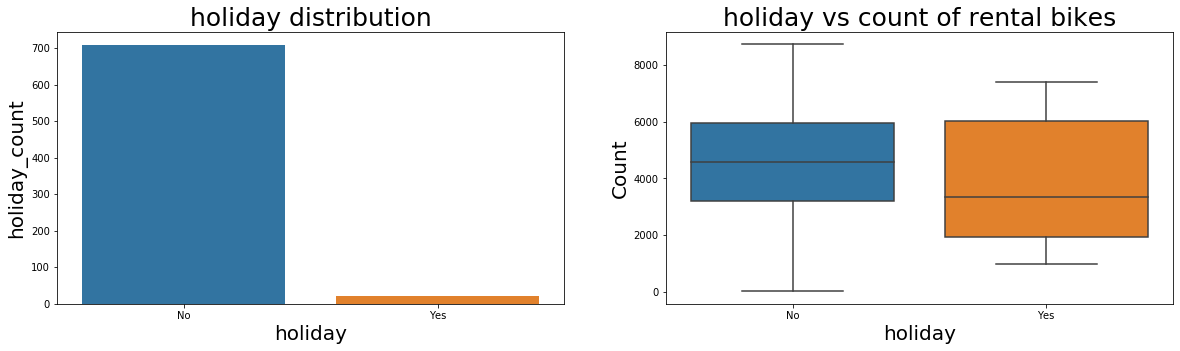

In [21]:
holiday_data = bike_data.loc[:, ['holiday', 'cnt']]

holiday_count = holiday_data.groupby('holiday').size().reset_index(name = 'holiday_count')
PlotCategoricalData(holiday_count, bike_data.holiday, bike_data.cnt)

### Observation:
In general On holidays the number of bikes rented seems to be low.

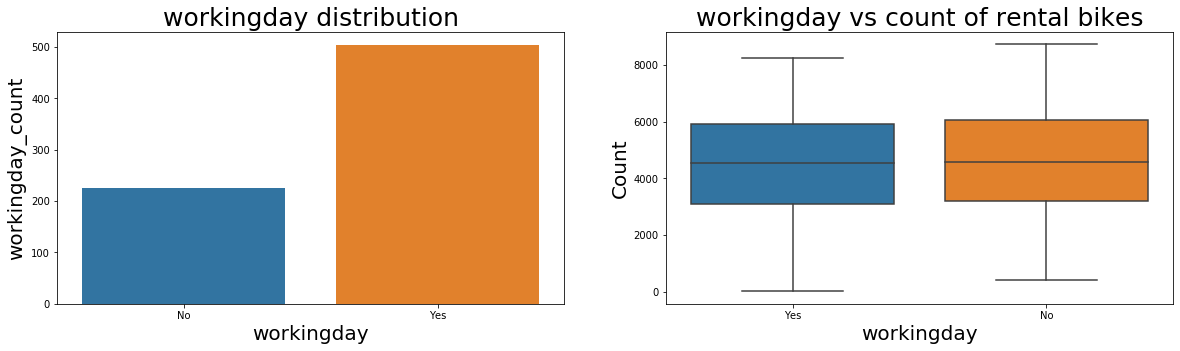

In [22]:
workingday_data = bike_data.loc[:, ['workingday', 'cnt']]

workingday_count = workingday_data.groupby('workingday').size().reset_index(name = 'workingday_count')
PlotCategoricalData(workingday_count, bike_data.workingday, bike_data.cnt)

### Observation:
The number of bikes rented doesn't seem to be affected by workingday.

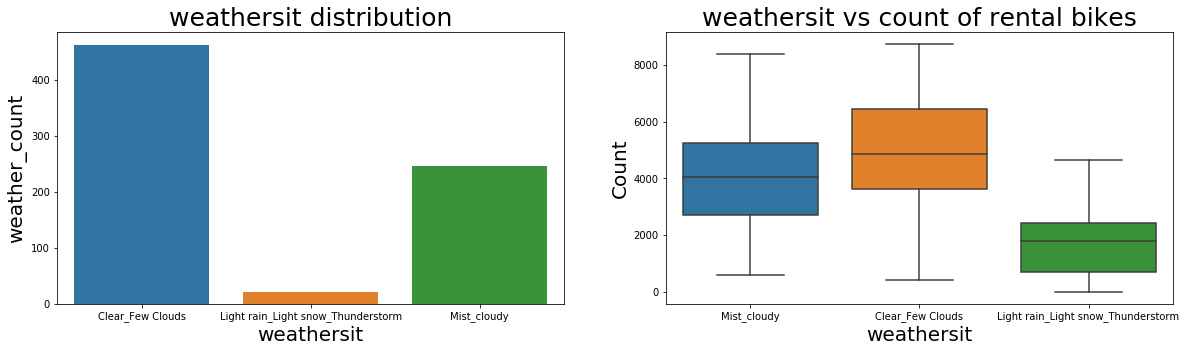

In [23]:
weather_data = bike_data.loc[:, ['weathersit', 'cnt']]

weather_count = weather_data.groupby('weathersit').size().reset_index(name = 'weather_count')
PlotCategoricalData(weather_count, bike_data.weathersit, bike_data.cnt)

### Observation:
It seems like if there is rain or snow or thunderstorm, bikes are not rented as frequently as opposed to clear weather with few clouds which is comfortable for bike riders.

### Data Augmenting : 
Creating 'dummy columns' from categorical data and adding categorical data in dummy column format to the analysis dataframe

In [24]:
#Convert variables to object type
bike_data['yr'] = bike_data['yr'].astype(object)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 88.4+ KB


In [25]:
# Iterate through categorical variables : create dummies (columns) from them
# list of columns 
column_names = list(bike_data)
dummies_data = pd.DataFrame()

# iterate through columns & create dummies for categorical data and also drop categorical column in analysis dataframe
for column_name in column_names :

    # if it is categorical data, create dummies out of this column
    if (bike_data[column_name].dtype == 'object') :        

        # categorical values for this column
        cat_data = pd.get_dummies(bike_data[column_name], drop_first=True)
        cat_data = cat_data.add_prefix(column_name + '_') # not to introduce duplicate column names
        
        # drop the CarName column from analysis to replace them with dummy columns of the same
        bike_data.drop(columns = [column_name], inplace = True)
        print(column_name)
        #car_analysis = pd.concat([car_analysis, cat_data], axis = 1)
        dummies_data = pd.concat([dummies_data, cat_data], axis = 1)
        
print(bike_data.info())
print(dummies_data.info())

season
yr
mnth
holiday
weekday
workingday
weathersit
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atemp      730 non-null    float64
 1   hum        730 non-null    float64
 2   windspeed  730 non-null    float64
 3   cnt        730 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 48.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   season_spring                                  730 non-null    uint8
 1   season_summer                                  730 non-null    uint8
 2   season_winter                                  730 non-null    uint8
 3   yr_1                                           730 non-null    uint

## Linear Regression

### Reusable VIF calculation method

In [26]:
# VIF table for all the dependent variables
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Feature Scaling : Scale feature value range

Let us do Min-Max scaling to reduce range of feature values between 0 & 1

Why not Standardization or Mean Normalization?

Because they are appropriate for algorithms like PCA which prefer zero-centered data

In [27]:
#defining a min-max scaling function : Min-Max Scaling to scale values between 0 and 1
def MinMaxScaling (x): 
    return ((x - min(x)) / (max(x) - min(x)))

# apply it on the analysis dataframe
bike_data = bike_data.apply(MinMaxScaling)
dummies_data = dummies_data.apply(MinMaxScaling)

In [28]:
# train and test size to be used commonly across the models that follow
train_sz = 0.70
test_sz = 0.30

### Split data into Dependent and Independent variables

In [29]:
# add dummy value columns to the dataframe for analysis
bike_data = pd.concat([bike_data, dummies_data], axis = 1)

# Putting feature variable to X
X = bike_data.drop(columns = ['cnt'], axis = 1)

# Putting response variable to y
y = bike_data.cnt

print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   atemp                                          730 non-null    float64
 1   hum                                            730 non-null    float64
 2   windspeed                                      730 non-null    float64
 3   season_spring                                  730 non-null    float64
 4   season_summer                                  730 non-null    float64
 5   season_winter                                  730 non-null    float64
 6   yr_1                                           730 non-null    float64
 7   mnth_Aug                                       730 non-null    float64
 8   mnth_Dec                                       730 non-null    float64
 9   mnth_Feb                                       730 non

In [30]:
# split data into train and test sections
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_sz, test_size = test_sz, random_state = 100)

#### Copy of the primary dataframe is created here. This will be trimmed and chopped employing multiple approaches before we draw our conclusion.

In [31]:
raw_features = X_train.copy(deep=True)
res = y_train.copy(deep=True)

### Model 1
Let us build our first model without removing any variables and observe how it pans out. By no measure is this recommended, but for the sake of our udnerstanding and analysis, this step is beneficial.

In [32]:
x_train = sm.add_constant(raw_features)
lm1 = sm.OLS(y_train, x_train).fit() # Ordinary least squares method
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     96.22
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.89e-177
Time:                        16:27:29   Log-Likelihood:                 519.77
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     481   BIC:                            -858.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Observation for model 1 :
Model built on raw features or variables has the above performance. This is our reference model. Multiple approaches will now be employed where we try to eliminate redudant features.

## Approach 1 (using RFE)

In this approach we are going to make use of RFE (Recursive feature elimination) technique to shortlist and provide us best set of features to build our model. Let us see how it pans out.

In [33]:
x_train = raw_features.copy(deep=True)

In [34]:
# we need to create one linear regression instance before running rfe.
lm = LinearRegression()
lm.fit(x_train, res)

LinearRegression()

### Approach 1 Model 1

This model is built on 15 top variables recommended by RFE.

In [35]:
# run rfe to extract 15 most important variables.
rfe = RFE(lm, 15)            
rfe = rfe.fit(x_train, res)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

# extracting only the rfe supported columns
col = list(x_train.columns[rfe.support_])
x_train_rfe15 = x_train[col]
col

['atemp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'yr_1',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Nov',
 'mnth_Sep',
 'holiday_Yes',
 'weathersit_Light rain_Light snow_Thunderstorm',
 'weathersit_Mist_cloudy']

In [36]:
rfe_15 = sm.add_constant(x_train_rfe15)
rfe_m1 = sm.OLS(res, rfe_15).fit() # Ordinary least squares method

print(rfe_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.26e-186
Time:                        16:27:30   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Approach 1 Model 2

This model is built on 10 top variables recommended by RFE.

In [37]:
# run rfe to extract 15 most important variables.
rfe = RFE(lm, 10)            
rfe = rfe.fit(rfe_15, res)
list(zip(rfe_15.columns,rfe.support_,rfe.ranking_))

# extracting only the rfe supported columns
col = list(rfe_15.columns[rfe.support_]) 
x_train_rfe10 = rfe_15[col]
col

['atemp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'yr_1',
 'mnth_Aug',
 'mnth_Sep',
 'holiday_Yes',
 'weathersit_Light rain_Light snow_Thunderstorm']

In [38]:
rfe_10 = sm.add_constant(x_train_rfe10)
rfe_m2 = sm.OLS(res, rfe_10).fit() # Ordinary least squares method

print(rfe_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.98e-183
Time:                        16:27:30   Log-Likelihood:                 487.06
No. Observations:                 510   AIC:                            -952.1
Df Residuals:                     499   BIC:                            -905.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Approach 1 Model 3

This model is built on 5 top variables recommended by RFE.

In [39]:
# run rfe to extract 5 most important variables.
rfe = RFE(lm, 5)            
rfe = rfe.fit(rfe_10, res)
list(zip(rfe_10.columns,rfe.support_,rfe.ranking_))

# extracting only the rfe supported columns
col = list(rfe_10.columns[rfe.support_])
list(rfe_10.columns[~rfe.support_])
X_train_rfe5 = rfe_10[col]
col

['atemp',
 'hum',
 'windspeed',
 'yr_1',
 'weathersit_Light rain_Light snow_Thunderstorm']

In [40]:
rfe_5 = sm.add_constant(X_train_rfe5)
rfe_m2 = sm.OLS(res, rfe_5).fit() # Ordinary least squares method

print(rfe_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     302.8
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          3.01e-149
Time:                        16:27:31   Log-Likelihood:                 392.24
No. Observations:                 510   AIC:                            -772.5
Df Residuals:                     504   BIC:                            -747.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Observations from Approach 1 :
We built 3 different models completely relying on RFE to shortlist features after eliminating less significant ones.
Among 3 models following are common features:
1. 'season_spring',
2. 'yr_1',
3. 'mnth_Jan',
4. 'mnth_Nov',
5. 'weathersit_Light rain_Light snow_Thunderstorm'

RFE is working as expected. There are no aberrations. However, when we look at adjusted R-squared value we are still far away from reference model. So RFE need not be our benchmark model which could automatically select and produce best set of features/variables for building a regression model. Nonetheless we could compare these variables and also adjusted R-squared values obtained in other approaches.

## Approach 2 (manual feature elimination, VIF-analysis, P-value analysis, etc..)

In this approach we are going to look at possible existence of redudant variables which could lead to problems like multicollinearity and remove them progressively. After that we will look at VIF and P-values to remove remaining insignificant variables.

### Base model Analysis
Let us start with the reference model before we observe, analyse and manually shortlist variables to build regression models.

In [41]:
x_train = raw_features.copy(deep=True)

In [42]:
#create one linear regression instance.
lm = LinearRegression()
lm.fit(x_train, res)

LinearRegression()

In [43]:
x_train = sm.add_constant(x_train)
base_model = sm.OLS(res, x_train).fit() # Ordinary least squares method

print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     96.22
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.89e-177
Time:                        16:27:31   Log-Likelihood:                 519.77
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     481   BIC:                            -858.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Observations :
Model shows multicollinearity warning. It can be observed that there are certain groups of columns which could be causing multicollinearity. Let us delve deeper into that aspect and remove some featues, then build and observe the model statistics again.

### Approach 2 Model 1:

**Dealing with Seasonality**

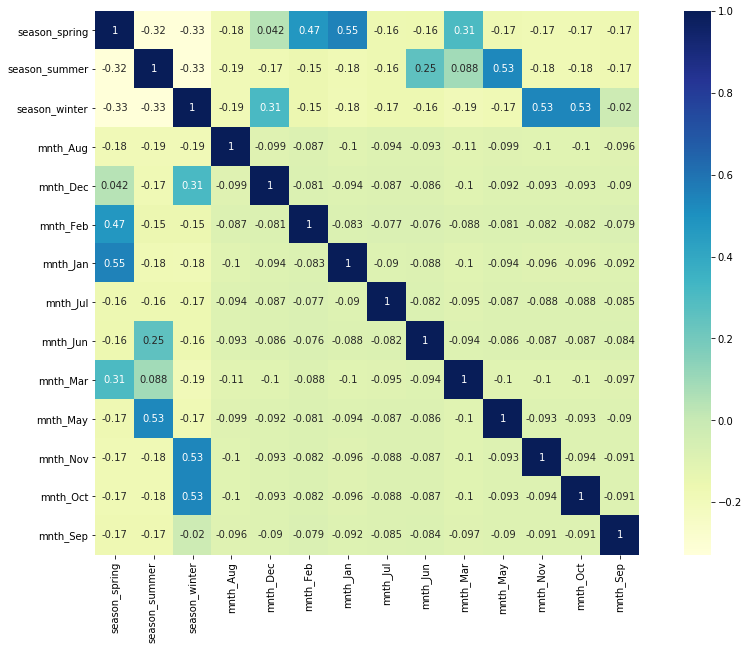

In [44]:
# Let's see the correlation matrix between seasons and months
season_month_df = x_train.copy(deep=True)
season_month_df = season_month_df[['season_spring', 'season_summer', 'season_winter', 'mnth_Aug', 
                                   'mnth_Dec', 'mnth_Feb', 'mnth_Jan','mnth_Jul', 'mnth_Jun', 
                                   'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep']]
plt.figure(figsize = (16, 10))
sns.heatmap(season_month_df.corr(), annot = True, cmap="YlGnBu", square =True)
plt.show()

#### Observation :
The model above indicated possible multicollinearity issue with our features. General knowledge tells us groups of months account for each of the seasons. Heatmap/correlation map illustrated above beautifully captures that logic. So, let us drop "mnth_xxx" columns/features and retain "season_xxx" columns/features. 

In [45]:
x_train.drop(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan','mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 
                  'mnth_Nov', 'mnth_Oct', 'mnth_Sep'], axis=1, inplace=True)

lm_model1 = sm.OLS(res, x_train).fit()
print(lm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     139.6
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.01e-175
Time:                        16:27:33   Log-Likelihood:                 487.77
No. Observations:                 510   AIC:                            -939.5
Df Residuals:                     492   BIC:                            -863.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Observation :
The model above indicates possible multicollinearity issue with our features even now though we dealt with seasonality. It is to be noted that drop in adjusted r squared value is not huge. Therefore, let us proceed and deal with remaining multicollinearity problem. 

### Approach 2 Model 2:

**Dealing with workday**

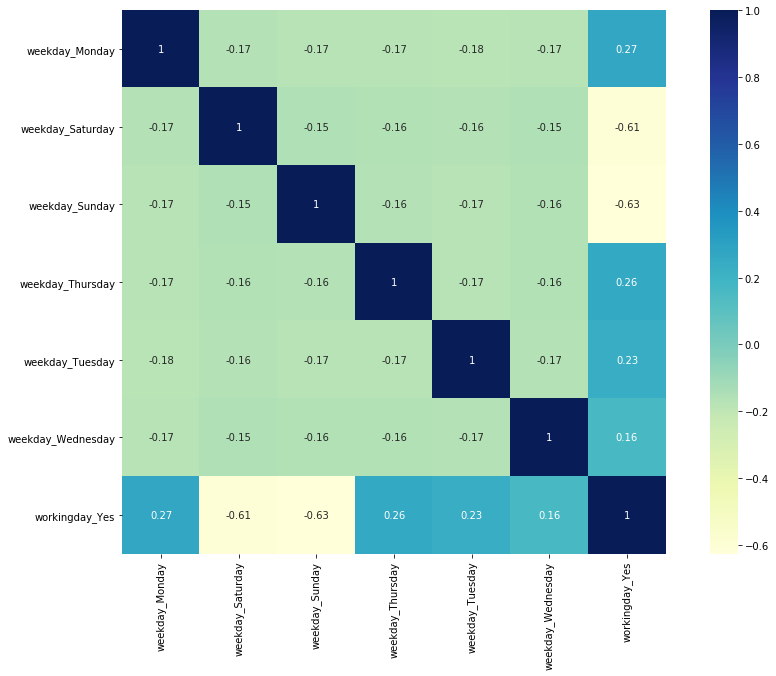

In [46]:
# Let's see the correlation matrix between days of the week, work day and holiday
work_day_df = x_train.copy(deep=True)
work_day_df = work_day_df[['weekday_Monday', 'weekday_Saturday','weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
                                   'weekday_Wednesday', 'workingday_Yes']]
plt.figure(figsize = (16, 10))
sns.heatmap(work_day_df.corr(), annot = True, cmap="YlGnBu", square =True)
plt.show()

#### Observation :
The model above indicated possible multicollinearity issue with our features. General knowledge tells us Monday to Friday are weekdays and are working days. Heatmap/correlation map illustrated above beautifully captures that logic. So, let us drop "weekday_xxx" columns/features and retain "workingday_Yes" columns/features. 

In [47]:
# let us drop the 'mnth_xxx' columns and 'weekday_xxx' and see impact of that on regression model
x_train.drop(['weekday_Monday', 'weekday_Saturday','weekday_Sunday', 'weekday_Thursday', 
                  'weekday_Tuesday', 'weekday_Wednesday'], axis=1, inplace=True)

lm_model2 = sm.OLS(res, x_train).fit()
print(lm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.7
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.24e-180
Time:                        16:27:33   Log-Likelihood:                 483.28
No. Observations:                 510   AIC:                            -942.6
Df Residuals:                     498   BIC:                            -891.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Observation :
After we removed features/columns which could have resulted in multicollinearity, namely **weekdays** and **months**, we observe that the regression model does not indicate any multicollinearity warning. More importantly, we do not see significant drop in adjusted r squared of the model. So, let us continue to build more models with shortlisted/pruned features/columns/dependent variables. 

### Approach 2 Model 3:

**Dealing with workingday and holiday**

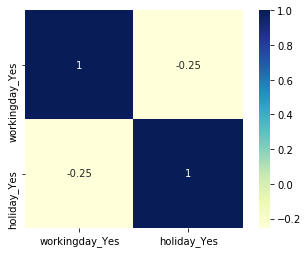

     workingday_Yes  holiday_Yes
653             1.0          0.0
576             1.0          0.0
426             0.0          0.0
728             1.0          0.0
482             0.0          0.0


In [48]:
# Let's see the correlation matrix between days of the week, work day and holiday
holiday_day_df = x_train.copy(deep=True)
holiday_day_df = holiday_day_df[['workingday_Yes', 'holiday_Yes']]
plt.figure(figsize = (6, 4))
sns.heatmap(holiday_day_df.corr(), annot = True, cmap="YlGnBu", square =True)
plt.show()

print(holiday_day_df.head())

#### Observation :
The model above does not indicate any possible multicollinearity issue with our features. So, let us retain these features.

### Approach 2 Model 4:

**Dealing with weather related variables**

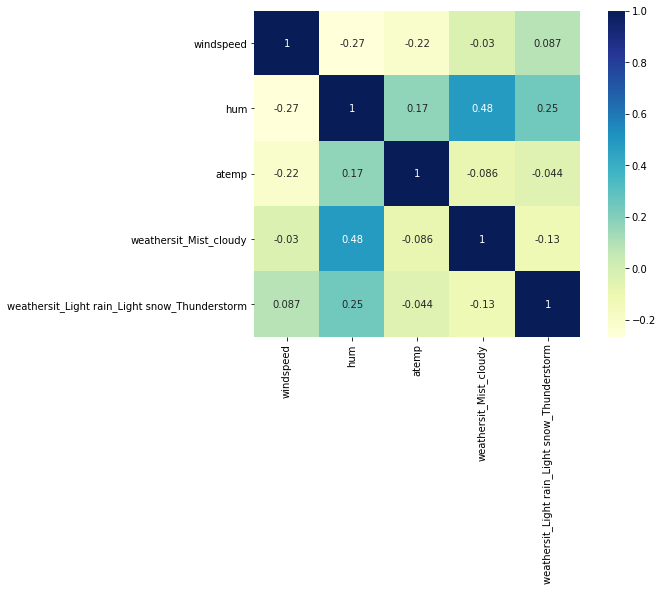

In [49]:
# Let's see the correlation matrix between days of the week, work day and holiday
holiday_day_df = x_train.copy(deep=True)
holiday_day_df = holiday_day_df[['windspeed', 'hum', 'atemp', 'weathersit_Mist_cloudy', 'weathersit_Light rain_Light snow_Thunderstorm']]
plt.figure(figsize = (10, 6))
sns.heatmap(holiday_day_df.corr(), annot = True, cmap="YlGnBu", square =True)
plt.show()

#### Observation :
The model above does not indicate any possible multicollinearity issue with our features. So, let us retain these features.

### Approach 2 Model 5:

Let us now look at VIF and P-values for all the variables in 'model 4' to eliminate possible insignificant variables.

In [50]:
checkVIF(x_train)

,Features,VIF
0,const,74.22
4,season_spring,4.16
1,atemp,3.24
6,season_winter,2.81
5,season_summer,1.94
2,hum,1.88
11,weathersit_Mist_cloudy,1.58
10,weathersit_Light rain_Light snow_Thunderstorm,1.25
3,windspeed,1.19
8,holiday_Yes,1.09


#### Observation :
As we can see both VIF and P-value is high for variable 'season_spring'. So we could eliminate this variable, create and observe the performance of the new model.

In [51]:
x_train = x_train.drop(['season_spring'],axis=1)

In [52]:
lm_model5 = sm.OLS(res, x_train).fit()
print(lm_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.9
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          6.72e-177
Time:                        16:27:35   Log-Likelihood:                 471.64
No. Observations:                 510   AIC:                            -921.3
Df Residuals:                     499   BIC:                            -874.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Observation :
We eliminated 'season_spring' variable and the model performance remained nearly the same. Let us now look at other variables, their VIF and P-values and see if we can further shortlist the variables without significant loss of model performance.

### Approach 2 Model 6:

Let us now look at VIF and P-values for all the variables in 'model 5' to eliminate possible insignificant variables.

In [53]:
checkVIF(x_train)

,Features,VIF
0,const,49.03
2,hum,1.86
10,weathersit_Mist_cloudy,1.57
1,atemp,1.24
9,weathersit_Light rain_Light snow_Thunderstorm,1.24
5,season_winter,1.23
3,windspeed,1.19
4,season_summer,1.15
7,holiday_Yes,1.09
8,workingday_Yes,1.09


### Observation :
As we can see both VIF and P-value are less for all the variables. So let us use RFE to extract top 5 most significant features.

In [54]:
x_train_rfe = x_train.copy(deep=True)

In [55]:
# we need to create one linear regression instance before running rfe.
lm_rfe = LinearRegression()
lm_rfe.fit(x_train, res)

LinearRegression()

In [56]:
# run rfe to extract 5 most important variables.
rfe_5 = RFE(lm_rfe, 5)            
rfe_5 = rfe.fit(x_train_rfe, res)
list(zip(x_train_rfe.columns,rfe_5.support_,rfe_5.ranking_))

# extracting only the rfe supported columns
col = list(x_train_rfe.columns[rfe_5.support_])
list(x_train_rfe.columns[~rfe_5.support_])
X_train_rfe_5 = x_train_rfe[col]
col

['atemp',
 'hum',
 'windspeed',
 'yr_1',
 'weathersit_Light rain_Light snow_Thunderstorm']

In [57]:
rfe_5 = sm.add_constant(X_train_rfe_5)
lm = sm.OLS(res, rfe_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     302.8
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          3.01e-149
Time:                        16:27:35   Log-Likelihood:                 392.24
No. Observations:                 510   AIC:                            -772.5
Df Residuals:                     504   BIC:                            -747.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

**Observations**:
We got the following shortlisted features using RFE after eliminating less significant ones.
1. 'atemp',
2. 'hum',
3. 'windspeed',
4. 'yr_1',
5. 'weathersit_Light rain_Light snow_Thunderstorm'

RFE is working as expected. There are no aberrations. However, when we look at adjusted R-squared value we are still far away from reference model. So RFE need not be our benchmark model which could automatically select and produce best set of features/variables for building a regression model. Nonetheless we could compare these variables and also adjusted R-squared values obtained in other approaches.

### Approach 2 Model 7:

Looking at models above, we have a shortlist of most significant variables. Now, let us try different combinatons of variables and observe which combination of variables results in best performance on training data to choose our top variables. 

In [58]:
# build models and identify top five variables
model_df = x_train.copy(deep=True)

# create a dataframe with most important variable from which we will choose the top five variables
# how to choose top five variables? Look at the combination of five variables which results in highest r-squared
model_df = model_df[[ 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_1', 'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy']]

print(model_df.columns)
import itertools
all_combos = list(itertools.combinations(model_df.columns, 5))

# train multiple models and choose that model with 5 variables which has highest r-squared value
cur_max = -1
top_vars = None
for cur_comb in all_combos:
    top_vars_df = model_df[list(cur_comb)]
    top_vars_df = sm.add_constant(top_vars_df)
    lm = sm.OLS(res, top_vars_df).fit()
    if lm.rsquared > cur_max:
        top_vars = list(cur_comb)
        cur_max = lm.rsquared

best_vars = model_df[top_vars]
best_vars = sm.add_constant(best_vars)
lm = sm.OLS(res, best_vars).fit()
print(lm.summary())

Index(['atemp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'yr_1',
       'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     361.5
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          4.34e-164
Time:                        16:27:36   Log-Likelihood:                 426.88
No. Observations:                 510   AIC:                            -841.8
Df Residuals:                     504   BIC:                            -816.4
Df Model:                           5                                         
Covariance Type:            nonrobust                      

In [59]:
# build models and identify top four variables
model_df = x_train.copy(deep=True)

# create a dataframe with most important variable from which we will choose the top four variables
# how to choose top four variables? Look at the combination of four variables which results in highest r-squared
model_df = model_df[[ 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_1', 'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy']]

print(model_df.columns)
import itertools
all_combos = list(itertools.combinations(model_df.columns, 4))

# train multiple models and choose that model with four variables which has highest r-squared value
cur_max = -1
top_vars = None
for cur_comb in all_combos:
    top_vars_df = model_df[list(cur_comb)]
    top_vars_df = sm.add_constant(top_vars_df)
    lm = sm.OLS(res, top_vars_df).fit()
    if lm.rsquared > cur_max:
        top_vars = list(cur_comb)
        cur_max = lm.rsquared

best_vars = model_df[top_vars]
best_vars = sm.add_constant(best_vars)
lm = sm.OLS(res, best_vars).fit()
print(lm.summary())

Index(['atemp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'yr_1',
       'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     402.5
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.67e-155
Time:                        16:27:37   Log-Likelihood:                 403.74
No. Observations:                 510   AIC:                            -797.5
Df Residuals:                     505   BIC:                            -776.3
Df Model:                           4                                         
Covariance Type:            nonrobust                      

In [60]:
# build models and identify top three variables
model_df = x_train.copy(deep=True)

# create a dataframe with most important variable from which we will choose the top three variables
# how to choose top three variables? Look at the combination of three variables which results in highest r-squared
model_df = model_df[[ 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_1', 'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy']]

print(model_df.columns)
import itertools
all_combos = list(itertools.combinations(model_df.columns, 3))

# train multiple models and choose that model with 3 variables which has highest r-squared value
cur_max = -1
top_vars = None
for cur_comb in all_combos:
    top_vars_df = model_df[list(cur_comb)]
    top_vars_df = sm.add_constant(top_vars_df)
    lm = sm.OLS(res, top_vars_df).fit()
    if lm.rsquared > cur_max:
        top_vars = list(cur_comb)
        cur_max = lm.rsquared

best_vars = model_df[top_vars]
best_vars = sm.add_constant(best_vars)
lm = sm.OLS(res, best_vars).fit()
print(lm.summary())

Index(['atemp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'yr_1',
       'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     446.3
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          1.11e-141
Time:                        16:27:38   Log-Likelihood:                 368.38
No. Observations:                 510   AIC:                            -728.8
Df Residuals:                     506   BIC:                            -711.8
Df Model:                           3                                         
Covariance Type:            nonrobust                      

### Observation about top variables:
Based on the three different trials we conducted above, it can be inferred that the three most significant variables are: 'atemp', 'season_winter' and 'yr_1'. This is very clear from our progressive technique of having evaluated different combinations of variables, from five most significant to three most significant variables. 'atemp', 'season_winter' and 'yr_1' are present among the three trials consistently. 

## Model Evaluation: Making predictions with the final model and evaluating the model using the Test split data

Based on the trials conducted so far, I choose to proceed with the following model with cleaned data including only the important variables which results in a stable model without violating any assumptions of Linear Regression which is also illustrated in this section through multiple plots.

In [61]:
x_test = X_test[[ 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_1', 'holiday_Yes', 'workingday_Yes',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy']]

In [62]:
#Use Test data-set to evaluate the model
x_test_pred = sm.add_constant(x_test)
Predicted_cnt = lm_model5.predict(x_test_pred)

# Obtain Mean Squared Error
mse = mean_squared_error(y_test, Predicted_cnt)

# Obtain Rsquare based score
r_squared = r2_score(y_test, Predicted_cnt)

man_mse = np.mean((y_test - Predicted_cnt)**2)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009761322541215043
r_square_value : 0.7944803358155554


Mean Squared Error here is obtained by scaling the target variable. However, then we would have to scale back the target variable to expected range before deploying the model in client environment. 

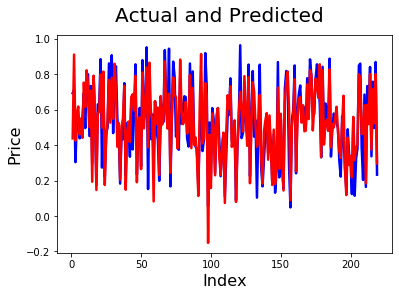

In [63]:
#Actual vs Predicted
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_cnt, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=16) # X-label
plt.ylabel('Price', fontsize=16) # Y-label
plt.show()

### Checking Assumption of Normality:

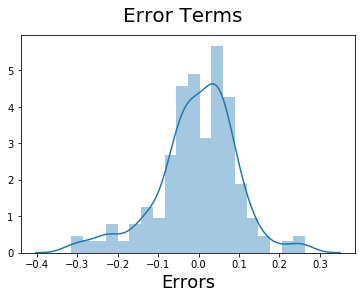

In [64]:
# Plot the histogram of the error terms
residual = y_test - Predicted_cnt 
fig = plt.figure()
sns.distplot(residual, bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Checking Assumption of Homoscedasticity

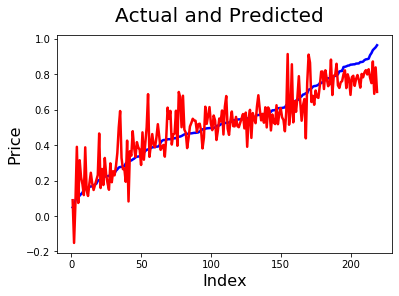

In [65]:
#Actual vs Predicted
sort_ord = np.argsort(y_test)
y_test = y_test.iloc[sort_ord]
Predicted_cnt = Predicted_cnt.iloc[sort_ord]

c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_cnt, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=16) # X-label
plt.ylabel('Price', fontsize=16) # Y-label
plt.show()

**Observation**
There are no funnel patterns observed. The error is uniform for both low and high range target values.

### Checking Assumption of Error Term Independence

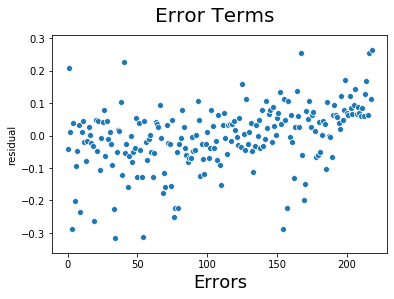

In [66]:
# Plot the histogram of the error terms
residual = y_test - Predicted_cnt
df = pd.DataFrame(data=residual, columns=['residual'])
df['index'] = df.reset_index().index
fig = plt.figure()
sns.scatterplot(data=df, x='index', y='residual')
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

No inherent patterns are visible. So, it can be inference that there is no dependence of error terms on one another. So, 'Error Term Independence' assumption holds good.

## Conclusion :

A stable model was built and conclusions were drawn from linear regression to suggest features that "BoomBikes" must pay attention to.
Our stable model results in R-Squared of 0.817 and Adjusted R-Squared of 0.813. 

Which variables are significant in predicting the demand for these shared bikes depends on?
Following are the variables which are significant in the predicting the demand of bikes :
* atemp
* season_summer
* season_winter
* hum
* windspeed
* yr_1
* holiday_Yes
* workingday_Yes
* weathersit_Light rain_Light snow_Thunderstorm
* weathersit_Mist_cloudy

What are the three most important variables from the above list?
* atemp
* season_winter
* yr_1